### This dataset contains information about used cars listed on www.cardekho.com
<b>This dataset is used for car price prediction</b> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv(r"C:\Users\oman\Desktop\PHPPRO\CAR_DETAILS .csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
#Checking unique values in categorical features
print(df["transmission"].unique())
print(df["fuel"].unique())
print(df["seller_type"].unique())
print(df["owner"].unique())

['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
#Creating a new feature called current year to get the age of car
df["current_year"]=2020

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [10]:
#Subtracting the car year with current year to get car age feature
df["car_age"]=df["current_year"]-df["year"]

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020,6


In [12]:
#Car Name won't play a major role in price
df1=df.drop(["year","current_year","name"],axis=1)

In [13]:
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


## Creating a dataframe of numerical features for analysis purpose only

In [14]:
data = df1[['selling_price','km_driven','car_age']]
data.head()

,selling_price,km_driven,car_age
0,60000,70000,13
1,135000,50000,13
2,600000,100000,8
3,250000,46000,3
4,450000,141000,6


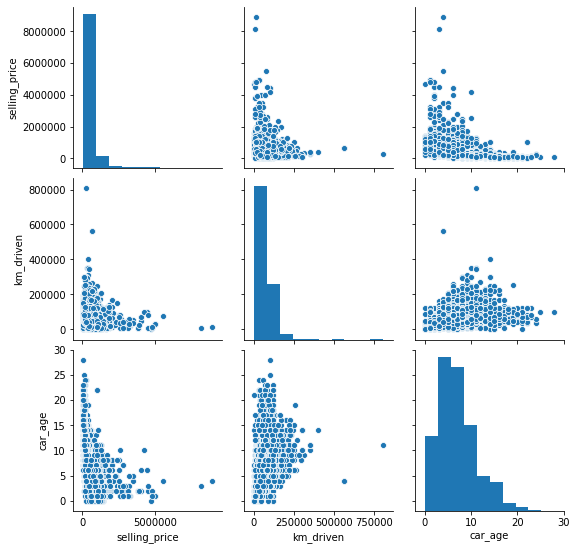

In [15]:
#Lets check correlation using pairplot.
#This doesn't give much info
sns.pairplot(data)

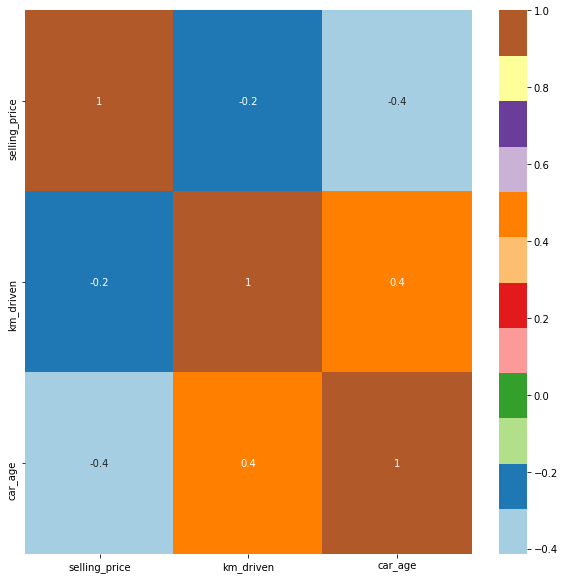

In [16]:
#Plotting heat map 
#fmt is used to round off the coefficient values, more understandble
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="Paired", fmt='.1g')

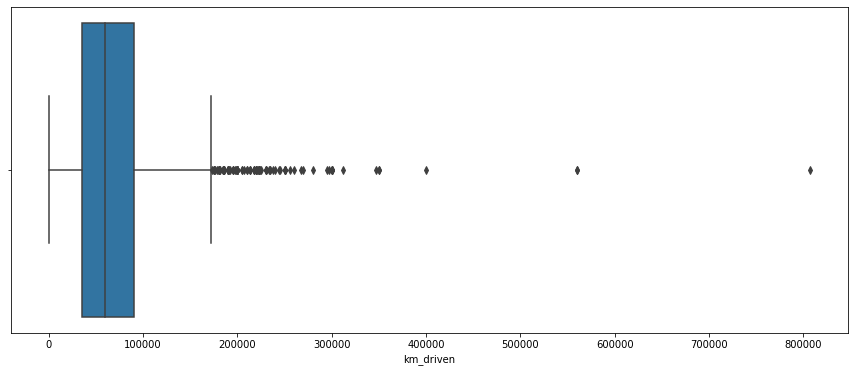

In [17]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(df1['km_driven'],width=0.9)

In [18]:
# Locating the row with large value as seen in boxplot
data.loc[(data.km_driven>500000)]

,selling_price,km_driven,car_age
525,665000,560000,4
1243,250000,806599,11
4184,665000,560000,4


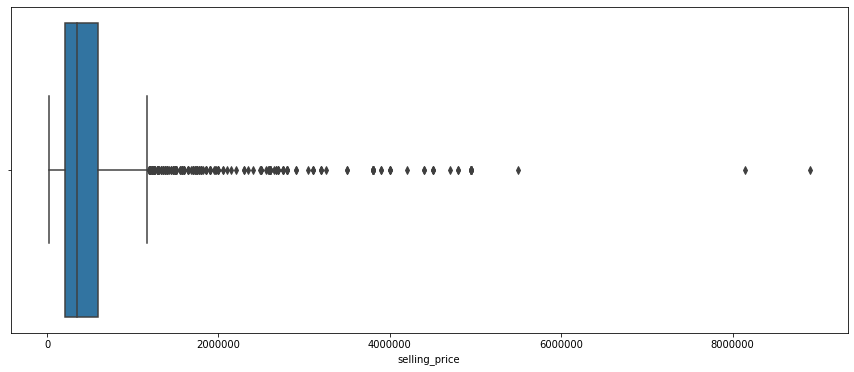

In [19]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(df1['selling_price'],width=0.9)

In [20]:
# Locating the row with large value as seen in boxplot
# Selling price has very significant outliers.
data.loc[(data.selling_price>5000000)]

,selling_price,km_driven,car_age
89,8150000,6500,3
3872,8900000,13000,4
3969,5500000,77350,4


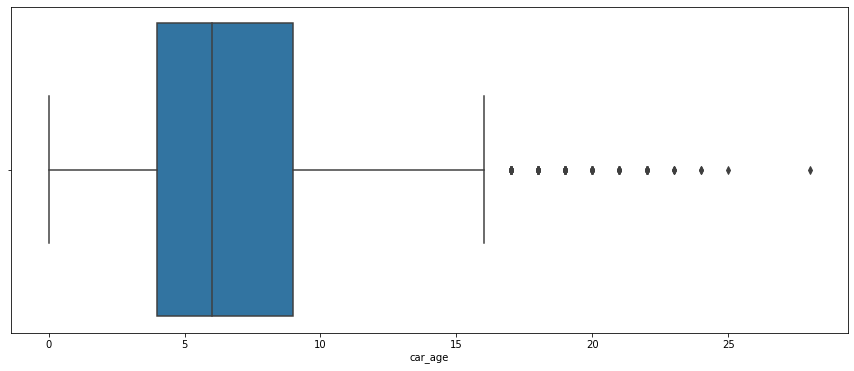

In [21]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(df1['car_age'],width=0.9)

In [22]:
# Locating the row with large value as seen in boxplot
data.loc[(data.car_age>15)]

,selling_price,km_driven,car_age
61,250000,35000,24
123,95000,50000,16
137,40000,40000,22
141,75000,57000,17
149,65000,70000,18
...,...,...,...
4153,90000,116000,18
4208,150000,256000,19
4232,125000,70000,16
4290,37500,90000,16


In [23]:
# Before outlier removal
df1.shape

(4340, 7)

## Using percentile method to remove outliers from selling price
    1) Here i am considering the minimum threshold as .02 which is double of minimum value i.e 20,000
    2) Then i am taking the maximum threshold as the max value of whisker i.2 .75*1.5 (600000*1.5)

In [24]:
min_threshold, max_threshold = df1.selling_price.quantile([.002, .90])
min_threshold, max_threshold

(40000.0, 900000.0)

In [25]:
data.quantile([.1, .25, .5, .75], axis = 0)

,selling_price,km_driven,car_age
0.10,110900.00,15000.0,2.0
0.25,208749.75,35000.0,4.0
0.50,350000.00,60000.0,6.0
0.75,600000.00,90000.0,9.0


In [26]:
# VALUES GREATER THAN MAX THRESHOLD
df1[df1.selling_price > max_threshold].head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
12,1650000,25000,Petrol,Dealer,Automatic,First Owner,2
25,1650000,25000,Petrol,Dealer,Automatic,First Owner,2
27,1195000,5000,Diesel,Dealer,Manual,First Owner,1
29,1964999,28000,Diesel,Dealer,Automatic,First Owner,6
30,1425000,59000,Diesel,Dealer,Automatic,First Owner,7


In [27]:
df2 = df1[(df1.selling_price<max_threshold) & (df1.selling_price>min_threshold)]
df2.shape
# After outlier removal and creating a different dataframe

(3870, 7)

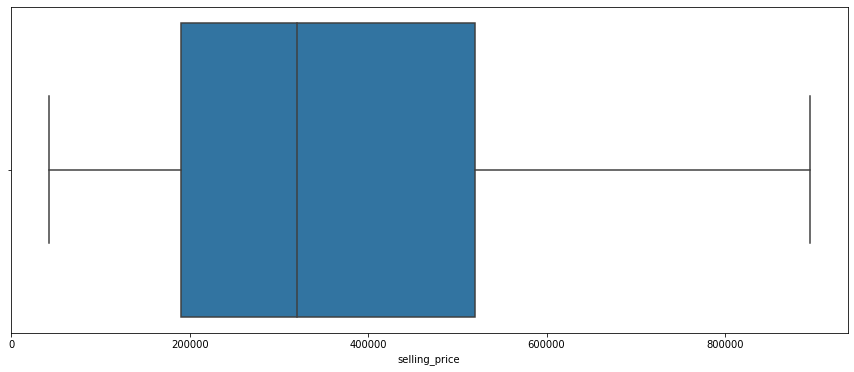

In [28]:
# No value above the outlier
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(df2['selling_price'],width=0.9)

## Feature Encoding

In [29]:
#Convert Categorical features into ONE HOT ENCODED
#drop_first=True will drop some features like transmission_automatic, sellet_type_dealer etc to prevent dummy variable trap
df2=pd.get_dummies(df2, drop_first=True)

In [30]:
df2.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [31]:
df2.shape

(3870, 14)

In [32]:
#Independent features
X=df2.iloc[:,1:]

In [33]:
X.head()

,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [34]:
#Dependent Feature
y=df2.iloc[:,0]

In [35]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [36]:
#Check all the feature importance for understanding
#Mostly used in complex datasets with large features
from sklearn.ensemble import ExtraTreesRegressor
imp = ExtraTreesRegressor()
imp.fit(X,y)
print(imp.feature_importances_)

[2.61915779e-01 5.01867367e-01 1.06057477e-01 1.81850603e-05
 2.54028295e-04 1.43491775e-03 2.94347181e-02 3.29069046e-02
 2.65533106e-02 4.47796905e-03 2.23582438e-02 2.21293671e-03
 1.05081627e-02]


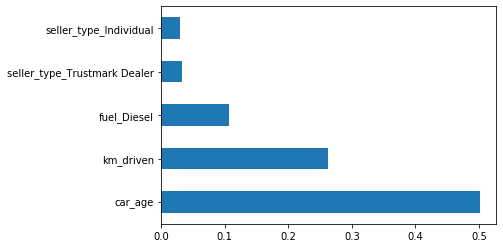

In [37]:
# Plot top 5 important features
feat_imp = pd.Series(imp.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [39]:
X_train.shape

(3096, 13)

In [40]:
y_train.shape

(3096,)

## Random Forest

In [41]:
# No need for feature scaling becoz it uses decision trees
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)
# Model Accuracy using normal train, test split

0.5432260000914106

In [42]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf_reg, X, y, cv=5)
cvs.mean()
# Model Accuracy using 5 Folds to train and test split

0.5570504088895647

## HyperParameter Tune

In [43]:
# List of Hyperparameters to be tuned using Random Search CV
# We can also do step this and following step in one command also without these for loops.
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num =12)] #No. of trees
max_features = ['auto', 'sqrt'] #No. of features to take at every split
max_depth = [int(x) for x in np.linspace(5, 30, num=6)] # max no. of level in trees
min_samples_split = [2, 5, 10, 15, 100] # min no. of samples required to split a node
min_samples_leaf = [1, 2, 5, 10] # min no. of samples required for each leaf

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# Creating a dictionary (Key Value pair) of parameters so it can be given to model
# Use this random_grid on parm_distributions i.e what are my different parameters
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
# create separate model 
rf = RandomForestRegressor()

In [47]:
random_rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42)
# using scoring='neg_mean_squared_error' you can print the RMSE for each parameter.
# verbose will display the progress

In [48]:
random_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [49]:
# This will show the best parameter values from the given parameters only.
random_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [50]:
# This will show the best parameter values from all the parameters inside Random Forest.
random_rf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Implementing the model again with best parameters

In [51]:
Random_best_param = RandomForestRegressor(
 n_estimators = 300,
 min_samples_split = 15,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 15)
Random_best_param.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
cvs_score = cross_val_score(Random_best_param, X, y, cv=5)
cvs_score.mean()
# Model Accuracy

0.6060651702657566

## Visualising the predictions

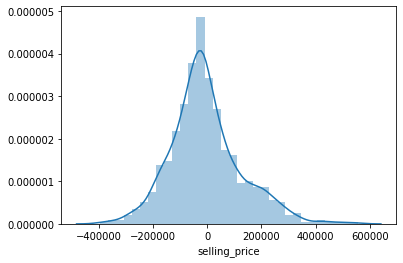

In [53]:
prediction = Random_best_param.predict(X_test)
sns.distplot(y_test-prediction)
# It follows normal distribution which is good
# y_test is our real value. The difference between X_test and y_test is minimal

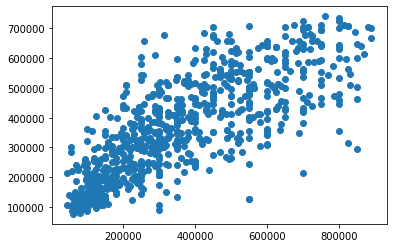

In [54]:
plt.scatter(y_test,prediction)
# Linear distribution of data. Our model is good 